In [9]:
from analysis_code.lib.utils import *
import matplotlib.pyplot as plt
import MDAnalysis as mda
import torch
from analysis_code.NP.NP_utils import *

In [14]:
Wall = generateNPWall(np.array([5,5,5]), 0.407)
writeGroAU(Wall,"Wall.gro")

In [25]:
u = mda.Universe("spherical.gro")
pos = torch.tensor(u.atoms.positions/10)
sulfur_pos = torch.tensor(read_dat_gen("sulfur.out"), requires_grad=True)

De = 36.664
alpha = 14.7
re = 0.265

sigma = 0.425
epsilon = 1.661

r_morse = torch.unsqueeze(sulfur_pos, 1) - pos
r_morse = torch.sqrt((r_morse**2).sum(dim=-1))
U_morse = De * (torch.exp( -2 * alpha * (r_morse - re) ) - \
                2 * torch.exp( - alpha * (r_morse - re)))
U_morse = U_morse.sum()


## LJ calculation
LJ_e = 0.0
for i in range(len(sulfur_pos)):
    for j in range(i+1, len(sulfur_pos)):
        r = sulfur_pos[i] - sulfur_pos[j]
        r = torch.sqrt((r**2).sum())
        
        LJ_e += 4 * epsilon * ((sigma/r)**12 - (sigma/r)**6)

total_E = U_morse + LJ_e
total_E.backward()

In [29]:
sulfur_pos.grad

tensor([[  786.0041,   587.7191,   151.7945],
        [  785.9997,   151.7934,   587.7200],
        [  151.7953,   785.9979,   587.7160],
        [  587.7266,   785.9811,   151.7837],
        [  587.7259,   151.7839,   785.9760],
        [  151.7818,   587.7283,   785.9738],
        [  608.6564,   719.0874,  -165.4212],
        [  717.7527,   684.3406,   -91.2796],
        [  608.6571,  -165.4205,   719.0865],
        [  717.7527,   -91.2796,   684.3404],
        [  -91.2807,   684.3395,   717.7536],
        [ -165.4217,   719.0867,   608.6562],
        [  588.6910,   587.5811,   292.9105],
        [  587.7605,   588.9567,   292.5035],
        [  629.1206,   317.7452,   589.7712],
        [  588.0412,   332.0920,   751.7698],
        [  317.9630,   515.4081,   629.4057],
        [  317.4616,   629.7391,   515.7711],
        [  319.2650,   128.5498,   609.6195],
        [  319.2653,   609.6204,   128.5498],
        [  609.6181,   128.5444,   319.2689],
        [  128.5494,   609.6219,  

In [2]:
sulfur_pos = read_dat_gen("sulfur.out")

In [4]:
u = mda.Universe("spherical.gro")
pos = u.atoms.positions/10

<IPython.core.display.Javascript object>


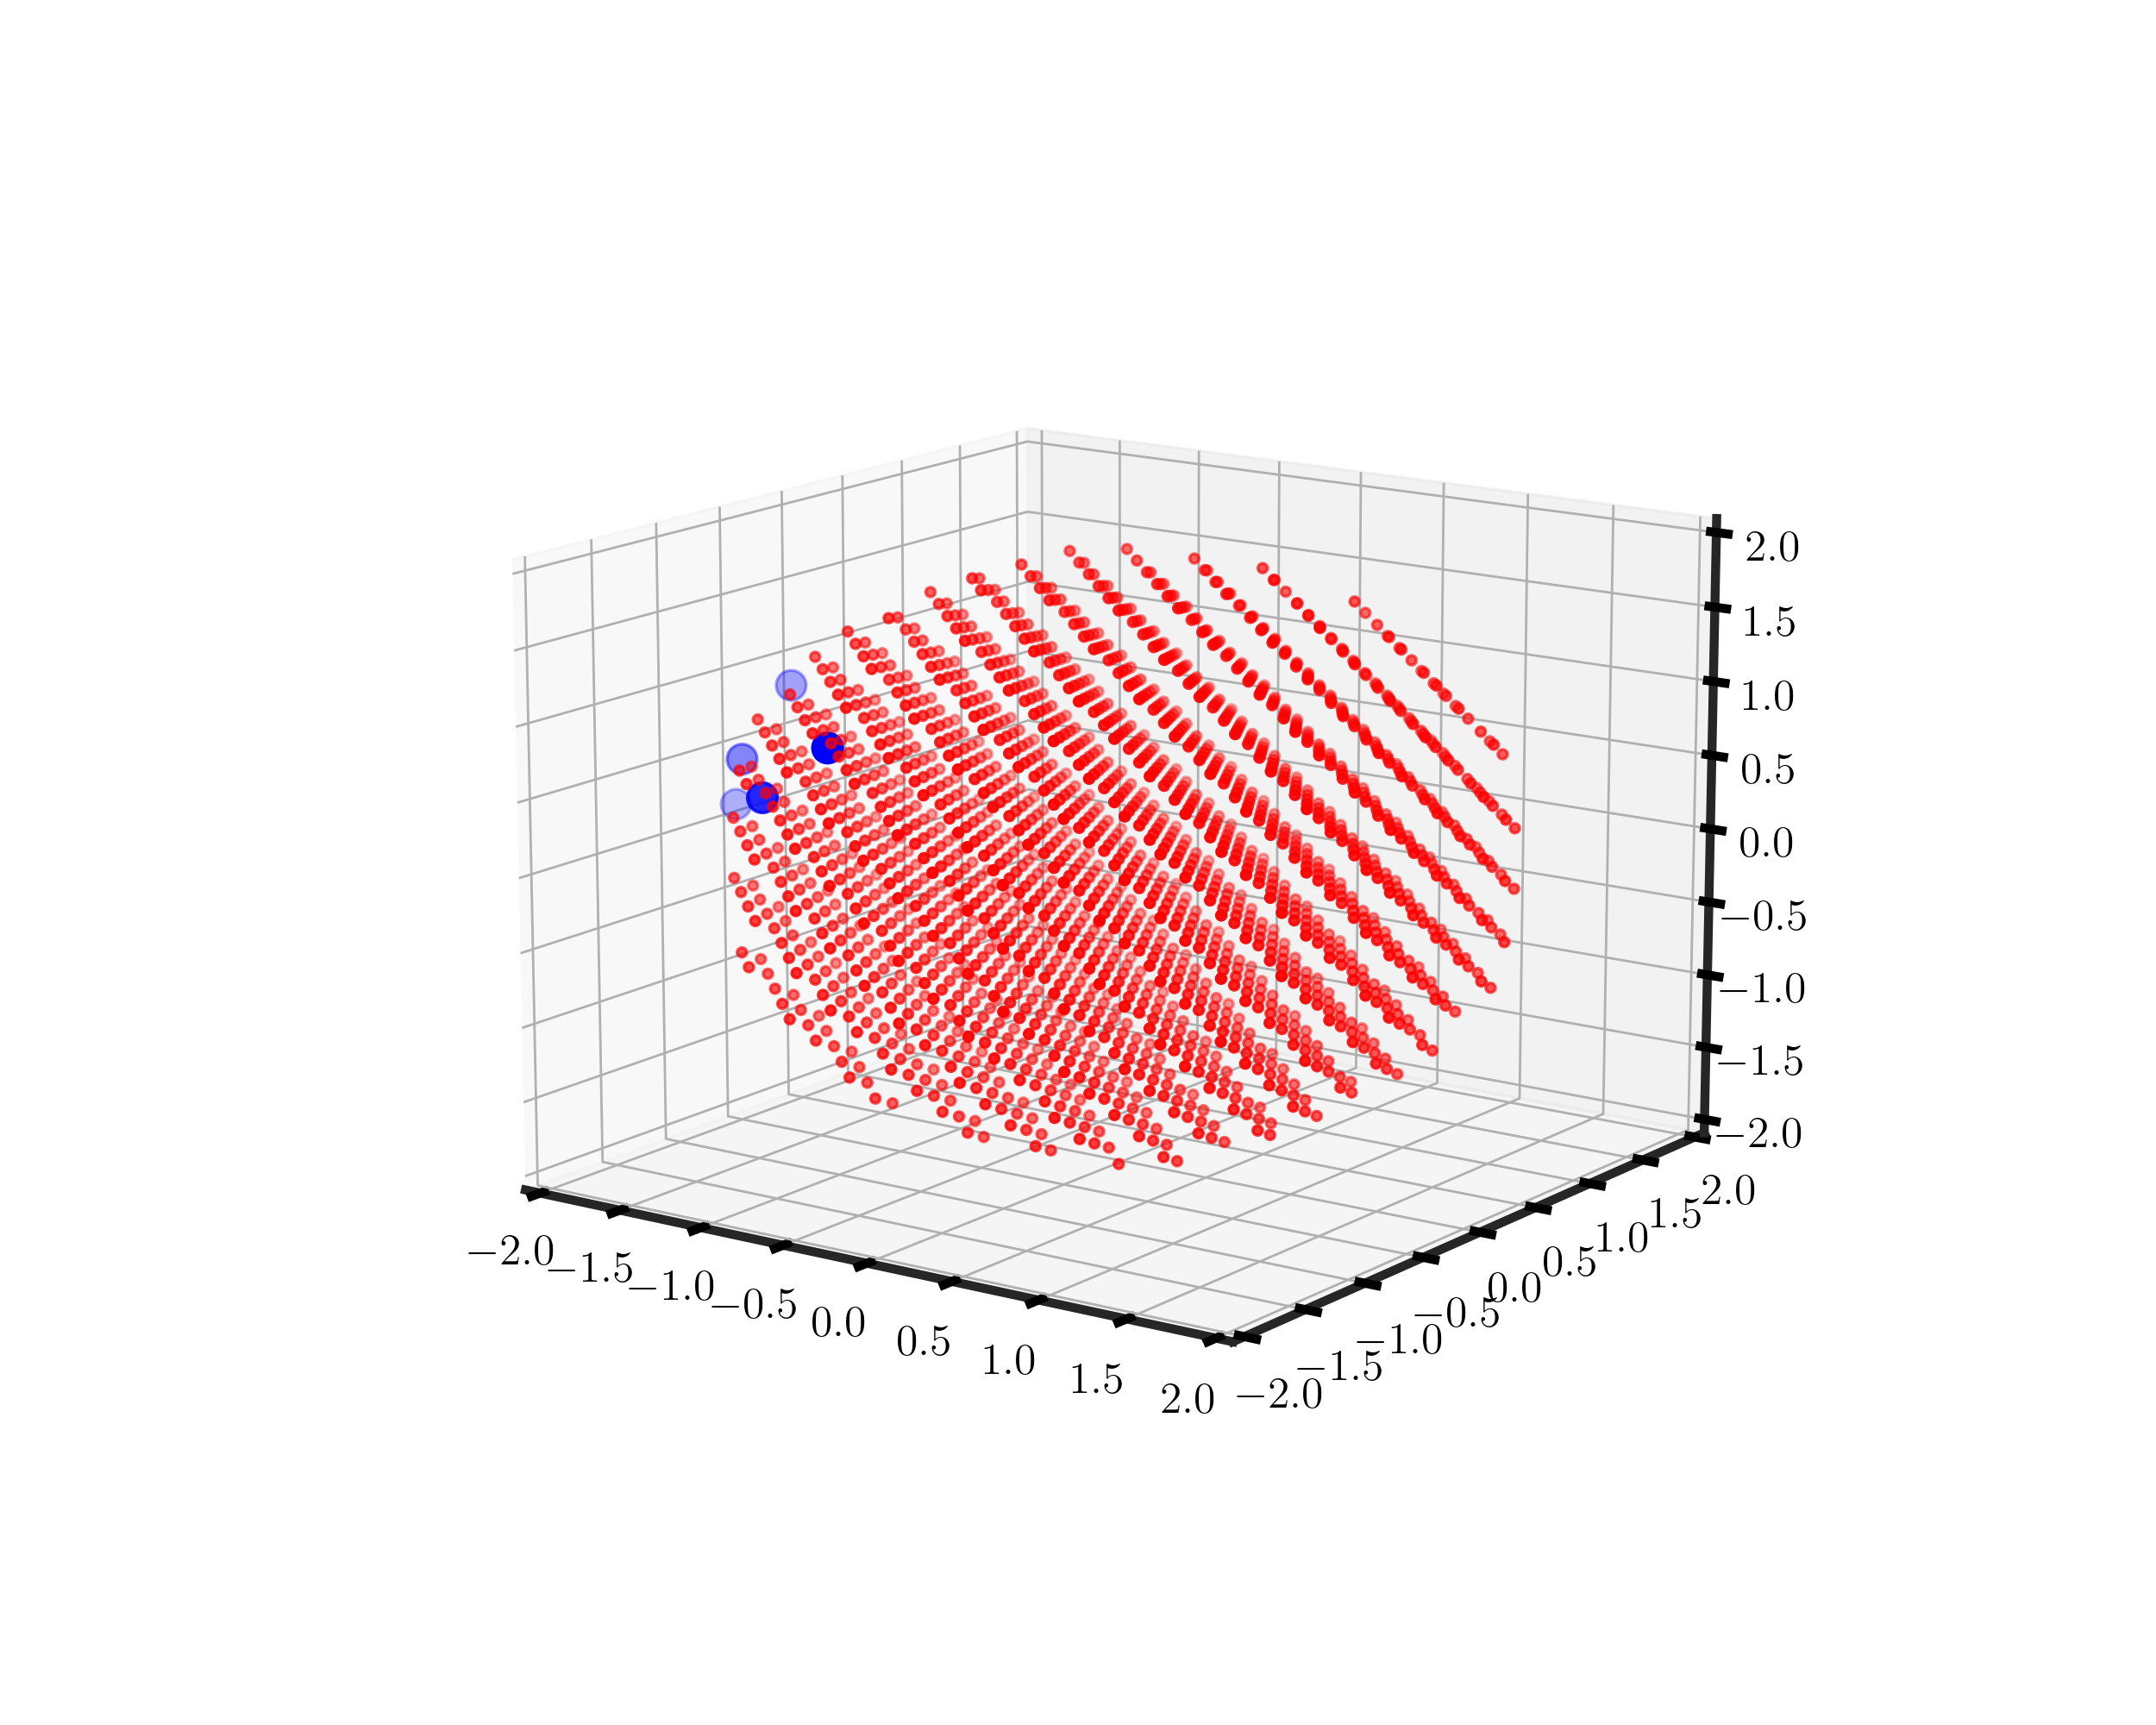

In [8]:
fig = plt.figure()
ax  = fig.add_subplot(111, projection='3d')
ax.scatter(pos[:,0], pos[:,1], pos[:,2], c='r',s=10)
ax.scatter(sulfur_pos[:5,0], sulfur_pos[:5,1], sulfur_pos[:5,2], c='b', s=100)

In [26]:
index

476911

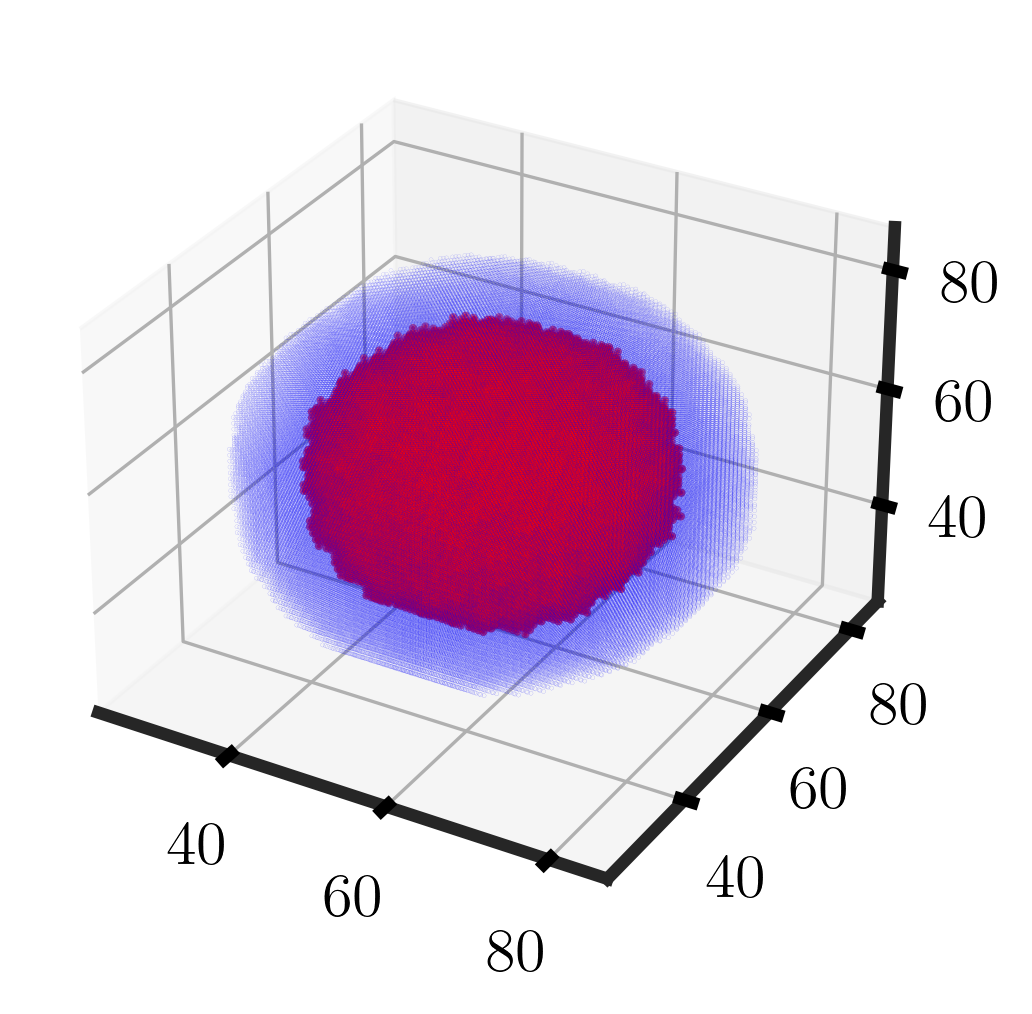

In [32]:
fig = plt.figure(dpi=300)
ax  = fig.add_subplot(111, projection='3d')
ax.scatter(index[:,0], index[:,1], index[:,2], c='r',s =1 )
ax.scatter(index2[:,0], index2[:,1], index2[:,2], c='b', s=0.001)